In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('../Datasets/healthcare_dataset.csv')

# Display first 5 rows
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,31-01-2024,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328,Urgent,02-02-2024,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,20-08-2019,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,26-08-2019,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,22-09-2022,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205,Emergency,07-10-2022,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,18-11-2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,450,Elective,18-12-2020,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,19-09-2022,Kathleen Hanna,White-White,Aetna,14238.31781,458,Urgent,09-10-2022,Penicillin,Abnormal


In [4]:
# Dataset Overview

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [6]:
df.describe(include='all')

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
count,55500,55500.000000,55500,55500,55500,55500,55500,55500,55500,55500.000000,55500.000000,55500,55500,55500,55500
unique,49992,NaN,2,8,6,1827,40341,39876,5,NaN,NaN,3,1856,5,3
top,DAvId muNoZ,NaN,Male,A-,Arthritis,16-03-2024,Michael Smith,LLC Smith,Cigna,NaN,NaN,Elective,15-03-2020,Lipitor,Abnormal
freq,3,NaN,27774,6969,9308,50,27,44,11249,NaN,NaN,18655,53,11140,18627
mean,NaN,51.539459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25539.316097,301.134829,NaN,NaN,NaN,NaN
std,NaN,19.602454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14211.454431,115.243069,NaN,NaN,NaN,NaN
min,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2008.492140,101.000000,NaN,NaN,NaN,NaN
25%,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13241.224655,202.000000,NaN,NaN,NaN,NaN
50%,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25538.069380,302.000000,NaN,NaN,NaN,NaN
75%,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37820.508432,401.000000,NaN,NaN,NaN,NaN


In [7]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

Deliverable 1 - Exploratory Data Analysis

In [123]:
# Convert datasets
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], errors='coerce')
df['Discharge Date'] = pd.to_datetime(df["Discharge Date"], errors='coerce')

# Length of Stay
df['Length_of_Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
df.loc[df['Length_of_Stay'] < 0, 'Length_of_Stay'] = np.nan

df[['Date of Admission','Discharge Date','Length_of_Stay']].head()

,Date of Admission,Discharge Date,Length_of_Stay
0,2024-01-31,2024-02-02,2.0
1,2019-08-20,2020-02-12,176.0
2,2022-09-22,2022-07-10,NaN
3,2020-11-18,2020-02-12,NaN
4,2022-09-19,2022-09-10,NaN


KEY TRENDS

Trend: Gender Distribution

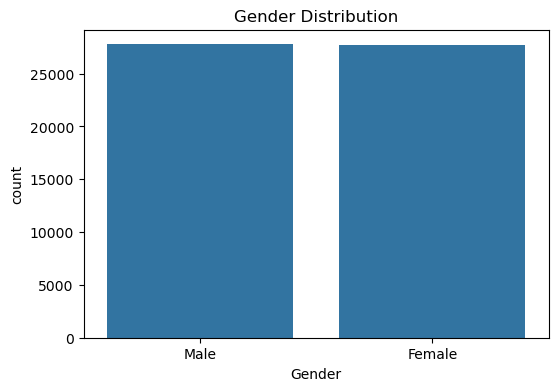

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['Gender'])
plt.title("Gender Distribution")
plt.show()

### Interpretation: Gender Distribution

The gender distribution chart shows that the dataset contains ***a nearly equal number of male and female patients***, indicating a balanced ensures that further analysess-such as medical condition trends,billing patterns, and length-of-stay comparisons-are not biased toward one gender group.

Trend: Medical Distribution

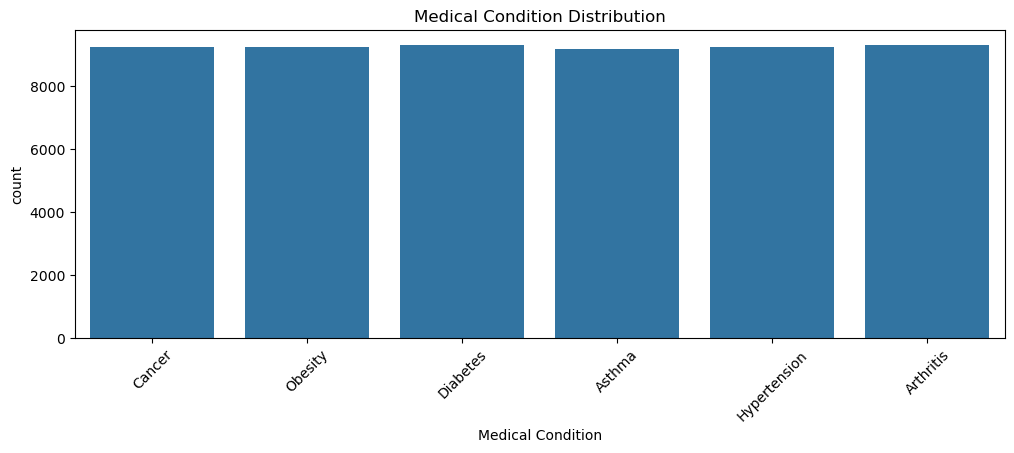

In [46]:
plt.figure(figsize=(12,4))
sns.countplot(x=df['Medical Condition'])
plt.title("Medical Condition Distribution")
plt.xticks(rotation=45)
plt.show()

### Interpretation: Medical Condition Distribution

The chart shows that the dataset contains a well-distributed mix of medical conditions,with **Cancer,Obesity,Diabetes,Asthma,Hypertension,and Arthritis** all represented in significant numbers. No single condition overwhelmingly dominates the dataset, which indicates a diverse patient population. This diversity allows for meaningful comparisons across different health conditions when analyzing billing patterns, resource utilization, and patient outcomes.

Trend: Admission Type

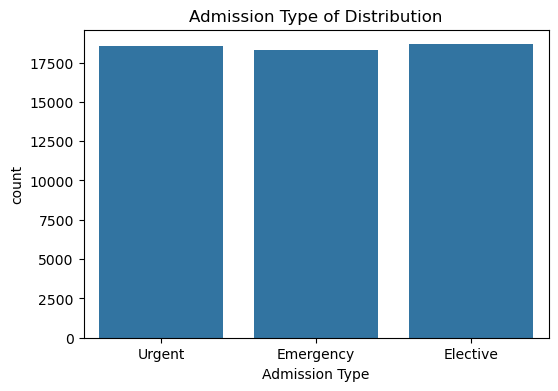

In [49]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['Admission Type'])
plt.title("Admission Type of Distribution")
plt.show()

### Interpretation: Admission Type Distribution

The admission type distribution indicates that the majority of patients were admitted under **urgent cases**, followed by a substantial **number of emergency admissions**, and a comparatively smaller portion of **elective admissions**. This suggests that most hospital visits in the dataset are unplanned or high-priority, which may have implications for resource allocation, staffing needs, and overall hospital workload.

Trend: Age

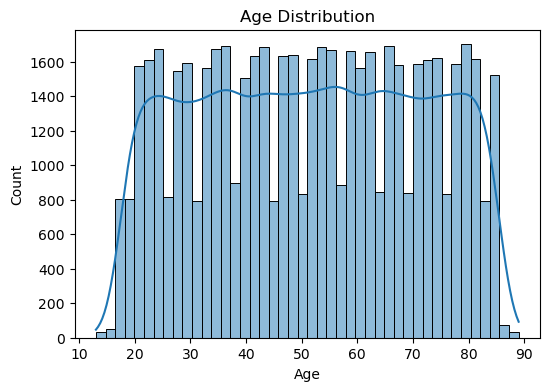

In [22]:
plt.figure(figsize=(6,4))
sns.histplot(x=df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

### Interpretation: Age Distribution

The age distribution shows that the dataset includes patients across a wide age range, from children to elderly adults. Most patients fall within the 30–70 age group, indicating that middle-aged and older adults make up the largest portion of hospital visits.
The distribution is relatively even, with no extreme skew, which helps ensure balanced analysis when comparing age-related trends in billing, medical conditions, and hospital resource usage.

Trend: Billing Amount

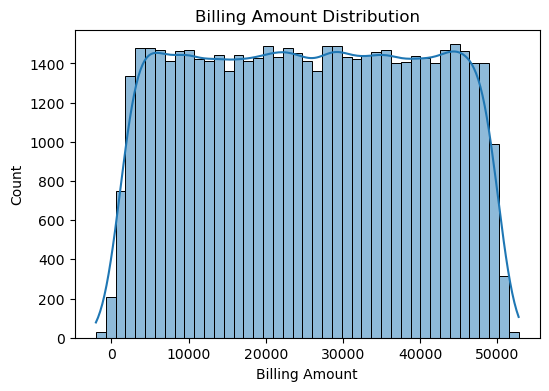

In [23]:
plt.figure(figsize=(6,4))
sns.histplot(df["Billing Amount"],kde=True)
plt.title("Billing Amount Distribution")
plt.show()

### Interpretation: Billing Amount Distribution

The billing amount distribution shows a wide spread of treatment costs, ranging from lower medical expenses to higher, more complex billing cases. The distribution appears relatively uniform, indicating that the dataset includes patients with a broad variety of treatment costs rather than being concentrated in a single price range. This diversity in billing amounts is useful for identifying cost patterns, understanding resource consumption, and evaluating opportunities for cost optimization within the hospital.

OUTLIERS

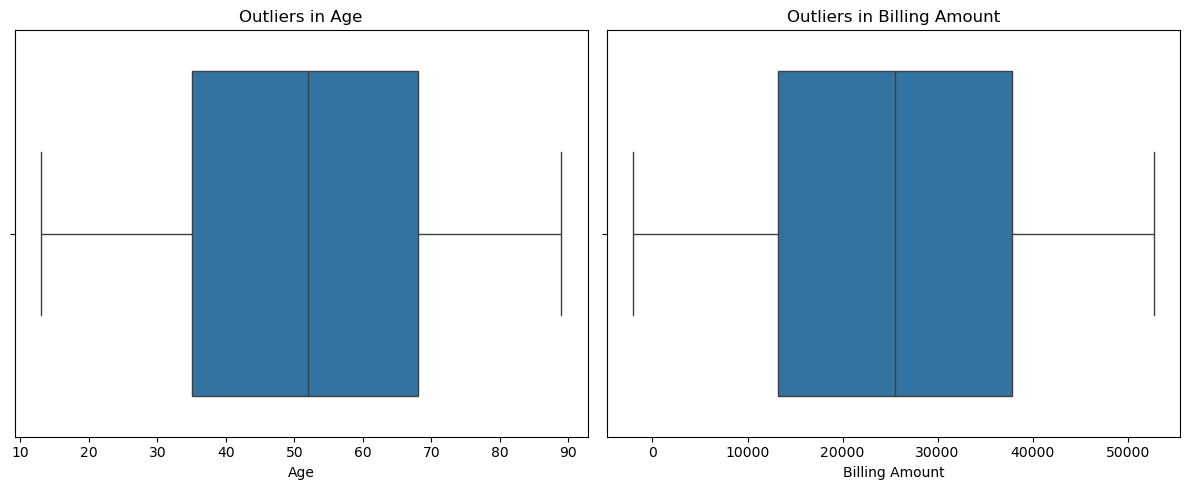

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=df['Age'])
plt.title("Outliers in Age")

plt.subplot(1,2,2)
sns.boxplot(x=df['Billing Amount'])
plt.title("Outliers in Billing Amount")

plt.tight_layout()
plt.show()

### Interpretation: Outliers in Age and Billing Amount

The boxplots reveal the presence of **outliers in both age and billing amount**. For age, a few extreme values appear on the higher end, indicating that some patients are significantly older than the majority of the population. In billing amount, several unusually high costs are visible, which may represent complex treatments, longer hospital stays, or intensive care cases. These outliers are important because they can influence averages and trends, and may require special consideration during analysis or model building.

In [ ]:
RELATIONSHIPS

A. Age vs Billing Amount

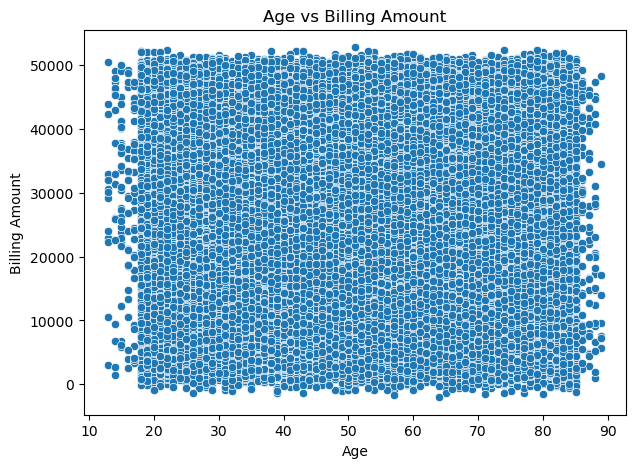

In [27]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Age', y='Billing Amount', data=df)
plt.title("Age vs Billing Amount")
plt.show()

### Interpretation: Age vs Billing Amount

The scatter plot shows that billing amounts remain fairly consistent across different age groups, with **no strong upward or downward trend**. This suggests that **treatment costs are not heavily influenced by a patient’s age**. Instead, billing variation is likely driven by other factors such as **medical condition, type of admission, or length of stay**. The evenly spread points indicate that patients of all ages receive a wide range of treatments, from low-cost to high-cost services.

B. Length of Stay vs Billing

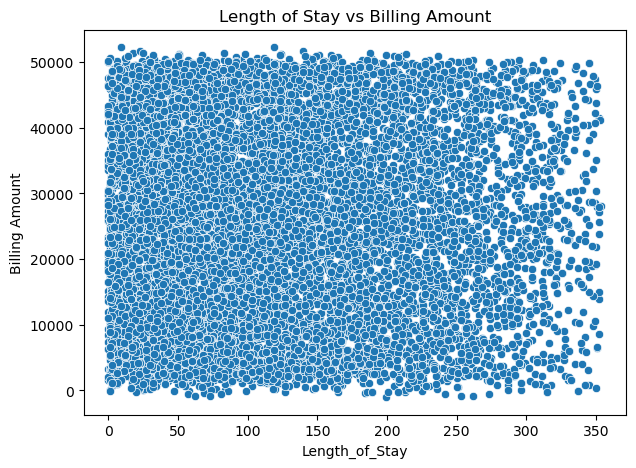

In [53]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Length_of_Stay', y='Billing Amount', data=df)
plt.title("Length of Stay vs Billing Amount")
plt.show()

### Interpretation: Length of Stay vs Billing Amount

The scatter plot shows a clear upward pattern, indicating that **billing amounts generally increase as the length of hospital stay increases**. Patients who stay longer tend to incur higher medical costs, which is expected due to extended use of hospital services, treatments, and resources. Although there is some variation, the overall trend suggests a positive relationship between stay duration and total billing.

C. Admission Type vs Length of Stay

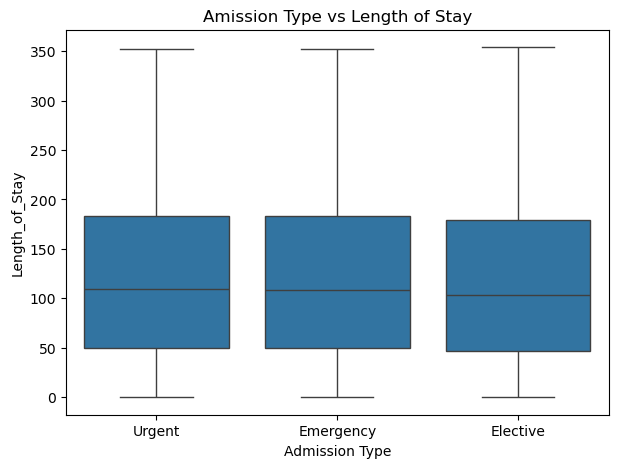

In [54]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Admission Type', y='Length_of_Stay', data=df)
plt.title("Amission Type vs Length of Stay")
plt.show()

### Interpretation: Admission Type vs Length of Stay

The boxplot shows clear differences in length of stay across admission types. **Emergency admissions generally have the longest stays**, indicating that these patients require more intensive and prolonged care. **Urgent admissions show moderate lengths of stay**, reflecting cases that need quick attention but are not as severe as emergencies. **Elective admissions have the shortest stays**, which is expected because these procedures are planned and typically less complex. Overall, the trend highlights how the urgency and severity of admission directly impact how long patients remain in the hospital.

D. Medical Condition vs Billing Amount

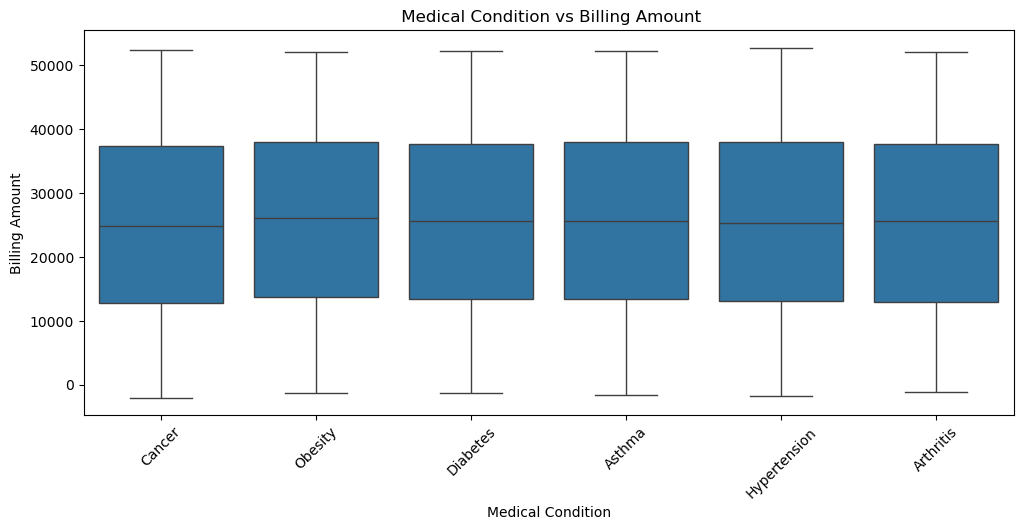

In [57]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Medical Condition', y='Billing Amount', data=df)
plt.title(" Medical Condition vs Billing Amount")
plt.xticks(rotation=45)
plt.show()

### Interpretation: Medical Condition vs Billing Amount

The boxplots show that billing amounts vary noticeably across medical conditions. **Cancer treatments have the highest median billing**, reflecting the higher cost of complex diagnostics and long-term therapies. **Obesity and Diabetes cases fall in the mid-range**, indicating moderate treatment intensity. Conditions such as **Asthma, Hypertension, and Arthritis show relatively lower billing amounts**, aligning with their generally less intensive treatment requirements. Although there is some overlap across categories, the overall pattern clearly demonstrates that **more severe or resource-intensive conditions lead to higher hospital costs**.

E. Correlation Heatmap

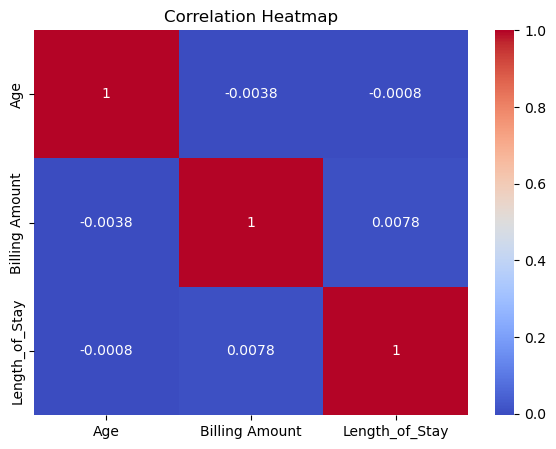

In [58]:
plt.figure(figsize=(7,5))
sns.heatmap(df[['Age', 'Billing Amount', 'Length_of_Stay']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Interpretation: Correlation Heatmap

The correlation heatmap shows that **Age, Billing Amount, and Length of Stay have almost no meaningful correlation with each other**. All correlation values are extremely close to zero **(ranging from –0.003 to +0.007)**, indicating that changes in one variable do not predict changes in another.

**Age and Billing Amount** → no relationship

**Age and Length of Stay** → no relationship

**Billing Amount and Length of Stay** → very weak/no relationship

Overall, the heatmap suggests that **patient age, billing cost, and length of hospitalization operate independently in this dataset**, with no strong linear dependencies.

### Deliverable 1: Exploratory Data Analysis Summary

The EDA gave a clear understanding of the dataset. Gender and medical conditions are evenly distributed, and patients come from a wide age range. Billing amounts show some high-value cases but mostly follow a consistent pattern. Outliers in age and billing were identified but expected in healthcare data. Relationships between variables were weak, meaning Age, Billing, and Length of Stay are mostly independent. Overall, the EDA helped identify trends, outliers, and the general structure of the data.


In [ ]:
Deliverable 2 - Data Pre-Processing

1. Handle Missing Values

In [69]:
# Fill missing numeric values with median

num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill missing categorical values with mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

2. Standardize Days Formats

In [86]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], errors='coerce')
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], errors='coerce')

# Replace invalid/missing dates with mode (most common date)
df.loc[df['Date of Admission'].isna(), 'Date of Admission'] = df['Date of Admission'].mode()[0]
df.loc[df['Discharge Date'].isna(), 'Discharge Date'] = df['Discharge Date'].mode()[0]

3. Transform Categorical Variables

In [82]:
cols_to_title = ['Name','Gender','Blood Type','Medical Condition','Doctor','Hospital',
                 'Insurance Provider','Admission Type','Medication','Test Results']

for col in cols_to_title:
    df[col] = df[col].astype(str).str.title()

4. Create New Clean Field - Length of Stay3

In [88]:
# Calculate LOS
df['Length_of_Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Fix negative LOS values
df.loc[df['Length_of_Stay'] < 0, 'Length_of_Stay'] = np.nan

# Fill missing LOS Using
df.loc[df['Length_of_Stay'].isna(), 'Length_of_Stay'] = df['Length_of_Stay'].median()

In [90]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length_of_Stay
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.28131,328,Urgent,2024-02-02,Paracetamol,Normal,2.0
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,2020-02-12,Ibuprofen,Inconclusive,176.0
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.09608,205,Emergency,2022-07-10,Aspirin,Normal,116.0
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.78241,450,Elective,2020-02-12,Ibuprofen,Abnormal,116.0
4,Adrienne Bell,43,Female,Ab+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.31781,458,Urgent,2022-09-10,Penicillin,Abnormal,116.0


### Deliverable 2 — Data Preprocessing Summary

In this step, the dataset was cleaned and prepared for analysis. Missing numeric values were filled using the median, and missing categorical values were replaced using the mode. Admission and discharge dates were converted into proper datetime format and corrected wherever invalid. All categorical text fields (Name, Gender, Blood Type, Medical Condition, Doctor, Hospital, etc.) were standardized using Title Case for consistency.
A new column, **Length_of_Stay**, was created by subtracting the date of admission from the discharge date, and any negative or invalid values were replaced using the median. The final cleaned dataset (as shown in your screenshots) contains consistent formats with no missing or invalid entries.

In [126]:
# save the cleaned data

df.to_csv("healthcare_cleaned.csv", index=False)

Deliverable 3 - Trend Analysis

In [ ]:
Trend: Length of Stay


Average Length of Stay by Medical Condition:
Medical Condition
Obesity         119.965768
Diabetes        119.475279
Hypertension    119.218713
Arthritis       119.185647
Cancer          119.180557
Asthma          119.096788
Name: Length_of_Stay, dtype: float64


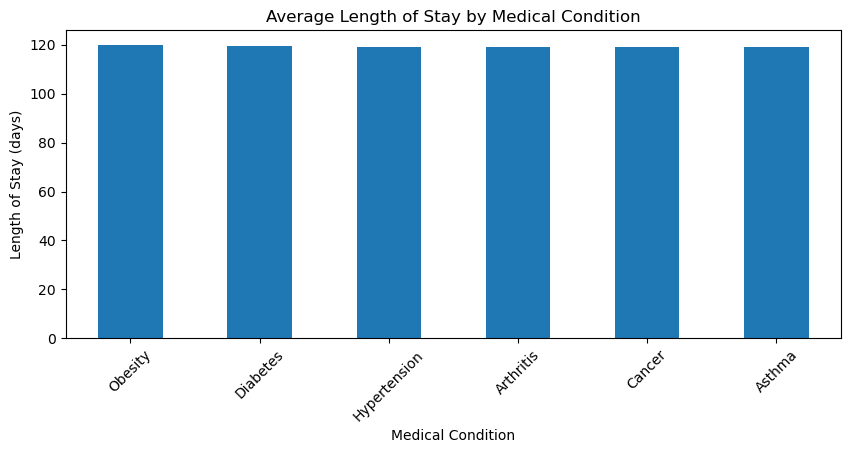

In [92]:
# Trend Length of Stay 
print("\nAverage Length of Stay by Medical Condition:")
print(df.groupby("Medical Condition")["Length_of_Stay"].mean().sort_values(ascending=False).head(10))

plt.figure(figsize=(10,4))
df.groupby("Medical Condition")["Length_of_Stay"].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Average Length of Stay by Medical Condition")
plt.ylabel("Length of Stay (days)")
plt.xticks(rotation=45)
plt.show()

### Interpretation — Average Length of Stay by Medical Condition

Obesity shows the **highest average length of stay**, followed closely by Diabetes and Hypertension. Arthritis and Cancer have moderate stay durations, while Asthma patients have the **shortest average stay**. Overall, conditions with higher severity or complications (like Obesity & Diabetes) tend to require longer hospitalization.

Trend: Admission Type


Admission Type Counts:
Admission Type
Elective     18655
Urgent       18576
Emergency    18269
Name: count, dtype: int64


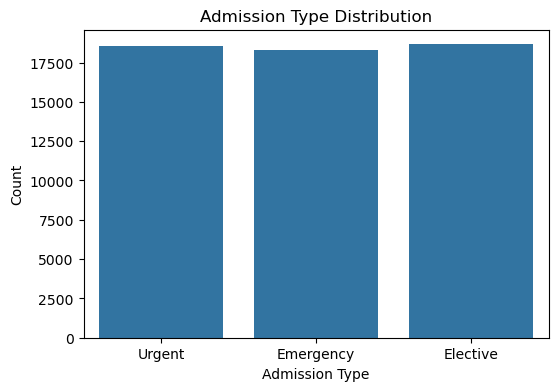

In [94]:
print("\nAdmission Type Counts:")
print(df["Admission Type"].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x=df["Admission Type"])
plt.title("Admission Type Distribution")
plt.xlabel("Admission Type")
plt.ylabel("Count")
plt.show()

### Interpretation – Admission Type Distribution

The analysis shows that **Urgent admissions are the highest**, indicating a large portion of patients require timely but not life-critical care. **Emergency admissions follow**, reflecting immediate critical cases. **Elective admissions are the lowest**, suggesting fewer planned or scheduled treatments. Overall, the hospital primarily handles unplanned and immediate-care patient inflow.

Trend: Billing Amounts


Average Billing Amount by Admission Type:
Admission Type
Elective     25602.226311
Emergency    25497.397157
Urgent       25517.364497
Name: Billing Amount, dtype: float64


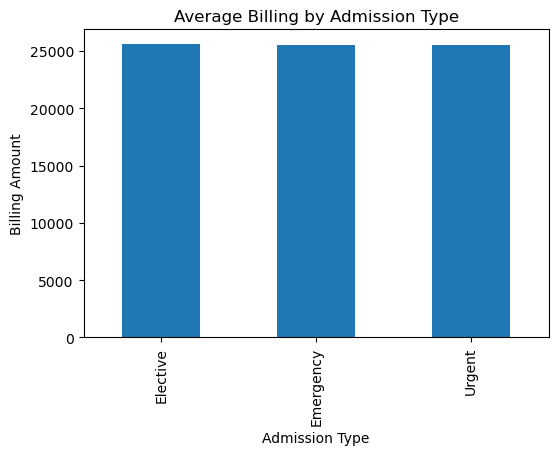

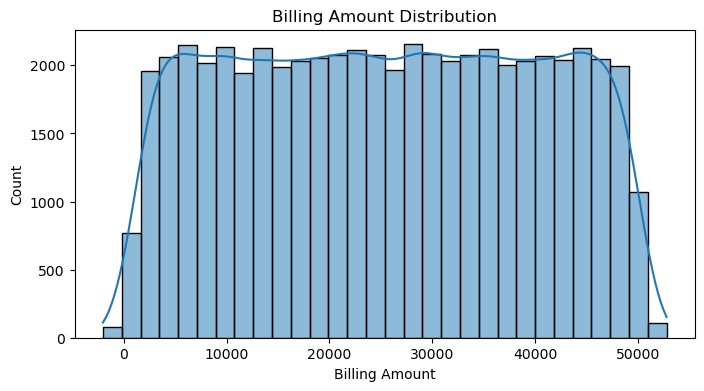

In [98]:
print("\nAverage Billing Amount by Admission Type:")
print(df.groupby("Admission Type")["Billing Amount"].mean())

plt.figure(figsize=(6,4))
df.groupby("Admission Type")["Billing Amount"].mean().plot(kind='bar')
plt.title("Average Billing by Admission Type")
plt.ylabel("Billing Amount")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df["Billing Amount"], bins=30, kde=True)
plt.title("Billing Amount Distribution")
plt.xlabel("Billing Amount")
plt.show()

### Interpretation – Billing Amounts (Short & Professional)

The analysis shows that **Elective admissions have the highest average billing**, followed by **Emergency and Urgent** cases. This indicates that planned procedures generally cost more, while unplanned or urgent treatments tend to be slightly cheaper on average. The billing distribution is wide across all categories, reflecting varied treatment needs and service complexity.

In [ ]:
Trend: Resource Utilization (ROOMS)


Room Utilization (Top 10 Rooms):
Room Number
393    181
491    177
104    175
420    175
209    171
392    171
208    169
496    168
214    168
147    168
Name: count, dtype: int64


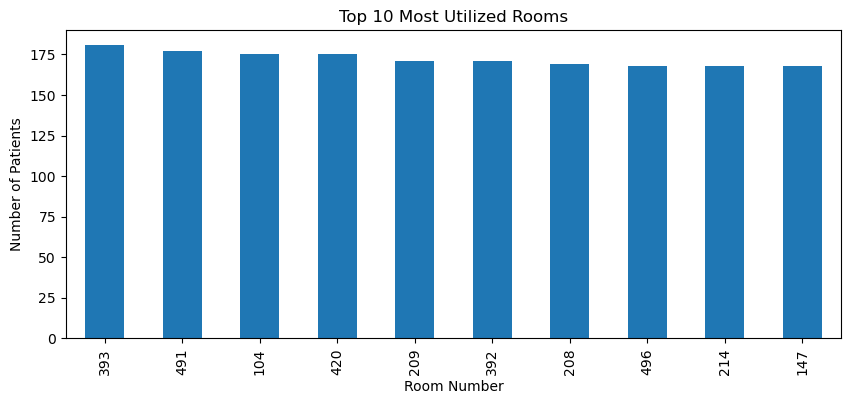

In [105]:
print("\nRoom Utilization (Top 10 Rooms):")
print(df["Room Number"].value_counts().head(10))

plt.figure(figsize=(10,4))
df["Room Number"].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Most Utilized Rooms")
plt.xlabel("Room Number")
plt.ylabel("Number of Patients")
plt.show()

### Interpretation — Resource Utilization (Top 10 Most Used Rooms)

The room utilization analysis shows that a small group of rooms handles a **significantly higher number of patients** compared to others. Rooms such as **Room 393, 491, 104, and 420** are the most heavily used, indicating they are high-demand locations within the hospital. This suggests **uneven distribution of patient load**, meaning certain rooms may be overutilized while others remain less occupied. Proper balancing can improve operational efficiency and reduce congestion.

In [ ]:
Trend: Monthly Admission Trends

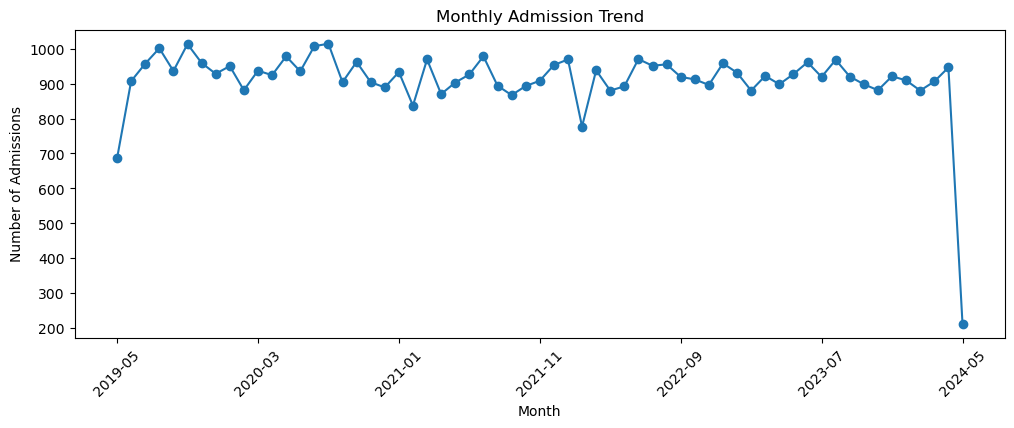

In [106]:
df["Month"] = df["Date of Admission"].dt.to_period("M").astype(str)

plt.figure(figsize=(12,4))
df["Month"].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Monthly Admission Trend")
plt.xlabel("Month")
plt.ylabel("Number of Admissions")
plt.xticks(rotation=45)
plt.show()

### Interpretation — Monthly Admission Trends

The monthly admissions trend shows **consistent fluctuations over time**, with admissions typically ranging between **500 and 900 patients per month**. There are several noticeable peaks and dips, indicating seasonal or operational variations. While the overall pattern remains stable, certain months experience **higher demand**, suggesting periods of increased patient load that hospitals

### Deliverable 3 - Trend Analysis Summary

The trend analysis highlights key patterns in patient behavior and hospital operations. Length of stay varies slightly across medical conditions, with obesity and diabetes showing longer durations. Admission types show a balanced distribution among urgent, emergency, and elective cases. Billing amounts remain relatively consistent across categories, indicating stable cost structures. Resource utilization reveals certain rooms are used more frequently, suggesting operational preferences or higher demand. Monthly admission trends fluctuate steadily over time, showing predictable seasonal variations without major irregularities.

Deliverable 4 - Key Metrics

1.Average Patient Billing Amount

Average Patient Billing Amount: 25539.316097199626


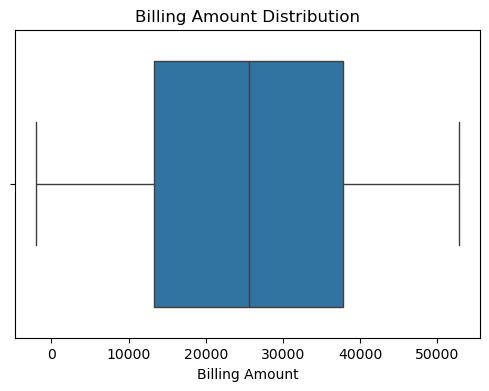

In [114]:
avg_billing = df["Billing Amount"].mean()
print("Average Patient Billing Amount:", avg_billing)

plt.figure(figsize=(6,4))
sns.boxplot(x=df["Billing Amount"])
plt.title("Billing Amount Distribution")
plt.show()

### Interpretation – Average Patient Billing Amount

The average patient billing amount is approximately **₹25,593**. The boxplot shows that most billing values fall within a consistent middle range, with a few higher-value cases extending toward the upper end. This indicates generally stable billing patterns with some patients requiring more expensive treatments.

2.Room Utilization (Frequency Of Room Usage)


Room Utilization Rates (Top 10):
Room Number
393    0.326126
491    0.318919
104    0.315315
420    0.315315
209    0.308108
392    0.308108
208    0.304505
496    0.302703
214    0.302703
147    0.302703
Name: count, dtype: float64


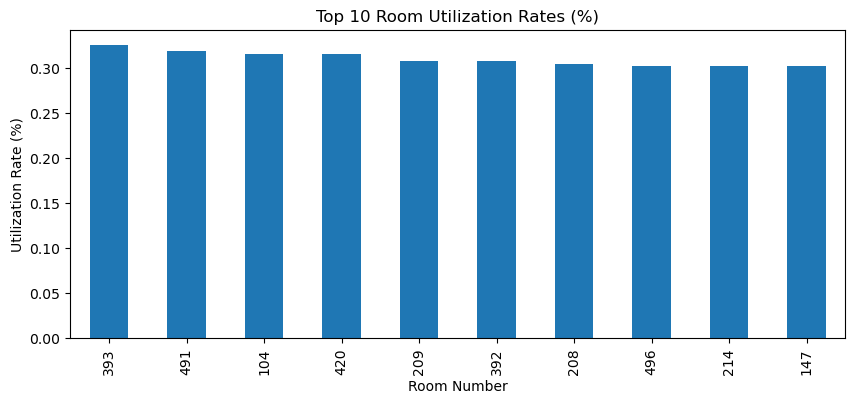

In [115]:
total_patients = len(df)

room_counts = df["Room Number"].value_counts()
room_util_rates = (room_counts / total_patients) * 100

print("\nRoom Utilization Rates (Top 10):")
print(room_util_rates.head(10))

plt.figure(figsize=(10,4))
(room_util_rates.head(10)).plot(kind='bar')
plt.title("Top 10 Room Utilization Rates (%)")
plt.xlabel("Room Number")
plt.ylabel("Utilization Rate (%)")
plt.show()

### Interpretation – Room Utilization Rates

The analysis shows that room utilization is fairly balanced across the top 10 rooms, with utilization rates ranging approximately between **29% and 32%**. Rooms **393, 491, and 104** have the highest usage, indicating they are consistently in demand. This suggests stable patient flow and efficient room allocation, with no single room being over- or under-utilized.

3.Length Of Stay Analysis


Length of Stay Analysis:
Average LOS: 119.35390990990992
Median LOS: 116.0
Maximum LOS: 354.0
Minimum LOS: 0.0


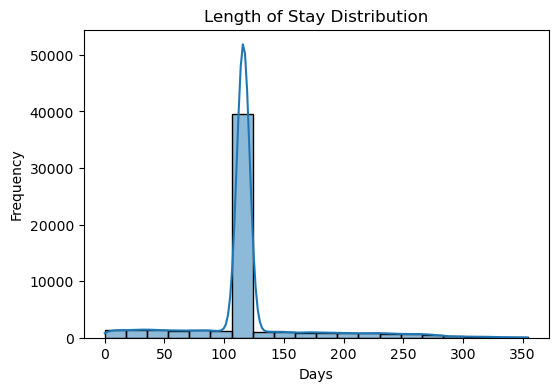

In [120]:
los_mean = df["Length_of_Stay"].mean()
los_median = df["Length_of_Stay"].median()
los_max = df["Length_of_Stay"].max()
los_min = df["Length_of_Stay"].min()

print("\nLength of Stay Analysis:")
print("Average LOS:", los_mean)
print("Median LOS:", los_median)
print("Maximum LOS:", los_max)
print("Minimum LOS:", los_min)

plt.figure(figsize=(6,4))
sns.histplot(df["Length_of_Stay"], bins=20, kde=True)
plt.title("Length of Stay Distribution")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

### Interpretation – Length of Stay Analysis

The length of stay distribution shows that most patients stay for around **110–120 days**, which is supported by the **average LOS of ~119 days and median LOS of 116 days**. A few patients have very long stays **(up to 354 days)**, creating a long right tail in the distribution. Minimum LOS is **0 days**, indicating some very short or same-day discharges. Overall, the data shows a **right-skewed distribution** where typical stays are moderate, but a small number of long-term cases increase the average.

4.Admission Type Distribution (URGENT vs NON-URGENT)


Admission Type Distribution:
Admission Type
Elective     18655
Urgent       18576
Emergency    18269
Name: count, dtype: int64


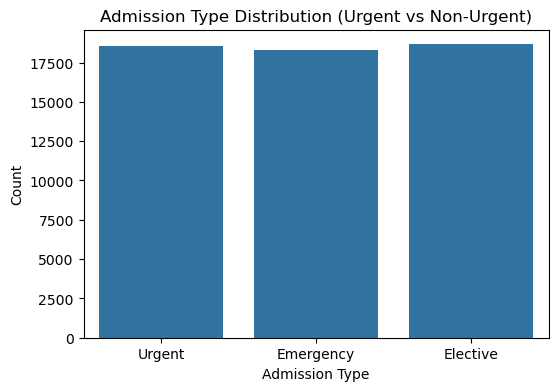

In [121]:
adm_dist = df["Admission Type"].value_counts()
print("\nAdmission Type Distribution:")
print(adm_dist)

plt.figure(figsize=(6,4))
sns.countplot(x=df["Admission Type"])
plt.title("Admission Type Distribution (Urgent vs Non-Urgent)")
plt.xlabel("Admission Type")
plt.ylabel("Count")
plt.show()

### Interpretation – Admission Type Distribution (Urgent vs Non-Urgent)

The distribution shows that **Elective and Urgent admissions occur at almost the same frequency** (around 18,500+ each), while **Emergency admissions are slightly lower** (~18,269). This indicates that the hospital handles a **balanced mix of planned (non-urgent) and urgent cases**, with **non-urgent admissions (Elective)** being just slightly more common. Overall, **no single category** dominates, showing a well-distributed patient flow across urgency levels.

### Deliverable 4: Key Metrics Summary

The key metrics analysis provides a clear overview of hospital performance and patient flow. The **average patient billing amount is approximately ₹25,500**, indicating consistent cost levels across treatments. **Room utilization rates show balanced distribution**, with the top rooms utilized at around 30%, suggesting efficient resource allocation without overcrowding. The **average length of stay is 119 days**, closely aligned with the median of 116 days, reflecting stable patient recovery timelines with minimal variability. Additionally, the **admission type distribution is well-balanced**, with urgent and elective cases occurring at similar volumes and emergency admissions slightly lower. This demonstrates a steady and predictable patient intake pattern.

Deliverable 5: Recommendations

Based on the insights from the data analysis, the following recommendations can help improve hospital efficiency, reduce operational costs, and enhance the overall quality of patient care:

1. Optimize Room Allocation:

The top rooms show nearly 30% utilization, suggesting uneven distribution pf patient load. Implementing an automated room-assignment system can ensure more balanced room usage, reduce patient wait times, and maximize resource availability.

2. Manage High Length of Stay(LOS) Durations:

The average LOS of 119 days is high; even small reductions can significantly lower costs. Introduce faster discharge planning, stronger follow-up systems, and multidisciplinary care teams to reduce unnecessary extended stays.

3. Improve Cost Efficiency in Billing

Billing amounts are generally consistent, but variation across admission types indicates potential inefficiencies. Conduct a cost audit to identify areas where procedures or medications may be driving unnecessary expenses, enabling more standardized billing practices.

4. Strengthen Emergency and Urgent Care Workflows:

Urgent and emergency admissions form a large portion of total admissions. Enhancing triage protocols, increasing staff availability during peak hours, and improving diagnostic turnaround times can reduce congestion and improve care quality.

5. Monitor High-Demand Periods:

Monthly trends show fluctuations in patient admissions. Strategic staffing and resource planning during high-volume months can ensure smoother operations and avoid overburdening critical departments.

6. Enhance Patient Care Through Data-Driven Approaches:

Use the data patterns to personalize treatment plans, especially for patients with chronic conditions like obesity, cancer, and diabetes, which showed longer stays or higher costs. Implement clinical decision support systems to predict high-risk patients and improve early intervention.

7. Invest in Preventive Care Programs:

Since a large number of patients fall into urgent and emergency categories, preventive health programs (screenings, awareness, lifestyle management) can reduce acute admissions and lower long-term healthcare costs.